In [1]:

from models.found import FoundModel
import torch
import os
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

In [2]:
model = FoundModel()
model.decoder_load_weights('/workspace/Dataset/pre-trained_weights/FOUND/decoder_weights.pt')
model.cuda()

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])


Loading model from weights /workspace/Dataset/pre-trained_weights/FOUND/decoder_weights.pt.


In [3]:
img_path = "/workspace/Code/OVSS/test_img/2007_003499.jpg"
img = Image.open(img_path).convert('RGB')
img_t = transform(img)[None, :, :, :].cuda()


In [4]:
mask = model.get_binary_result(img_t)

/opt/conda/envs/groupvit/lib/python3.7/site-packages/torch/nn/functional.py:3455: UserWarning: Default upsampling behavior when mode=bicubic is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
/opt/conda/envs/groupvit/lib/python3.7/site-packages/torch/nn/functional.py:3500: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


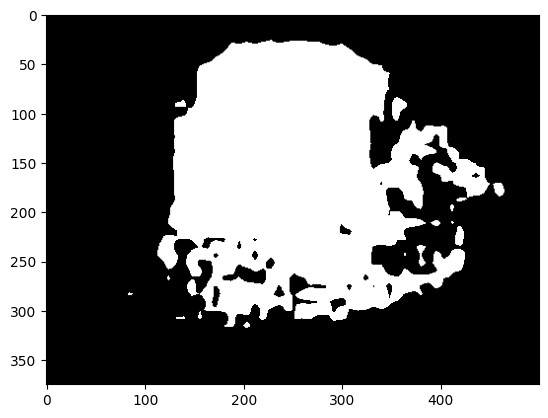

In [6]:
plt.imshow(mask.squeeze(0).cpu().numpy(), cmap='gray')
